In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
crime_data=pd.read_csv("crimes.csv")
socio_data=pd.read_csv("percapitaincome.csv")


In [3]:
crime_data=crime_data.drop_duplicates()


In [4]:
print(crime_data.isnull().sum())

ID                  0
Date                0
Block               0
Primary Type        0
X Coordinate    16726
Y Coordinate    16726
Year                0
Latitude        16726
Longitude       16726
Location        16726
dtype: int64


In [5]:
crime_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [6]:
crime_data.fillna({
    'Location Description': 'Unknown',
    'X Coordinate': crime_data['X Coordinate'].mean(),
    'Y Coordinate': crime_data['Y Coordinate'].mean()
}, inplace=True)


In [7]:
crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')

In [8]:
crime_data['Primary Type'] = crime_data['Primary Type'].str.strip().str.lower()
crime_data['Block'] = crime_data['Block'].str.strip().str.lower()


In [9]:
crime_data['Year'] = crime_data['Date'].dt.year
crime_data['Month'] = crime_data['Date'].dt.month
crime_data['Day'] = crime_data['Date'].dt.day
crime_data['Weekday'] = crime_data['Date'].dt.weekday
crime_data['Hour'] = crime_data['Date'].dt.hour

In [10]:
crime_counts = crime_data.groupby(['X Coordinate', 'Y Coordinate']).size().reset_index(name='Crime Count')


In [11]:
unique_values = crime_data['Primary Type'].unique()
print(unique_values) 

['theft' 'battery' 'assault' 'weapons violation' 'other offense'
 'burglary' 'narcotics' 'motor vehicle theft' 'criminal damage'
 'deceptive practice' 'offense involving children' 'criminal trespass'
 'robbery' 'interference with public officer' 'sex offense'
 'public peace violation' 'criminal sexual assault' 'prostitution'
 'homicide' 'stalking' 'arson' 'concealed carry license violation'
 'gambling' 'kidnapping' 'liquor law violation' 'intimidation' 'obscenity'
 'crim sexual assault' 'non-criminal' 'public indecency'
 'human trafficking' 'other narcotic violation' 'ritualism']


In [12]:
violent_crime_data = ['battery', 'assault', 'homicide', 'criminal sexual assault', 'offense involving children', 'crim sexual assault','human trafficking']
crime_data['Crime Category'] = crime_data['Primary Type'].apply(lambda x: 'Violent' if x in violent_crime_data else 'Non-Violent')


In [13]:
crime_data = crime_data[(crime_data['Latitude'] > 41) & (crime_data['Longitude'] < -87)]
crime_data = pd.get_dummies(crime_data, columns=['Primary Type'], drop_first=True)

In [14]:
scaler = StandardScaler()
columns_to_scale = ['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude']
crime_data[columns_to_scale] = scaler.fit_transform(crime_data[columns_to_scale])
crime_data


,ID,Date,Block,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Month,...,Primary Type_other offense,Primary Type_prostitution,Primary Type_public indecency,Primary Type_public peace violation,Primary Type_ritualism,Primary Type_robbery,Primary Type_sex offense,Primary Type_stalking,Primary Type_theft,Primary Type_weapons violation
6,12045583,2020-05-07 10:24:00,035xx s indiana ave,0.790828,-0.158866,2020,-0.161595,0.795377,"(41.830481843, -87.621751752)",5,...,False,False,False,False,False,False,False,False,True,False
7,12031001,2020-04-16 05:00:00,005xx w 32nd st,0.493112,-0.093507,2020,-0.095126,0.496350,"(41.836310224, -87.639624112)",4,...,False,False,False,False,False,False,False,False,False,False
8,12093529,2020-07-01 10:16:00,081xx s coles ave,2.012267,-1.100548,2020,-1.106693,2.009606,"(41.747609555, -87.549179329)",7,...,False,False,False,False,False,False,False,False,False,False
9,12178140,2020-09-27 23:29:00,065xx s wolcott ave,-0.023383,-0.797714,2020,-0.795721,-0.034880,"(41.77487752, -87.671374872)",9,...,False,False,False,False,False,False,False,False,False,False
11,12126129,2020-08-04 20:28:00,081xx s loomis blvd,0.195884,-1.124352,2020,-1.122533,0.180913,"(41.746220584, -87.658477307)",8,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699735,11683372,2019-05-11 01:55:00,034xx n halsted st,0.312034,1.135954,2019,1.132410,0.333013,"(41.943948446, -87.649386514)",5,...,False,False,False,False,False,False,False,False,False,False
699736,11686915,2019-05-01 19:00:00,012xx n austin blvd,-1.769662,0.653917,2019,0.659162,-1.774986,"(41.902451022, -87.775378157)",5,...,False,False,False,False,False,False,False,False,True,False
699737,11804687,2019-08-23 11:00:00,059xx w roosevelt rd,-1.711800,0.231656,2019,0.237614,-1.722012,"(41.86548702, -87.772211967)",8,...,False,False,False,False,False,False,False,False,False,False
699738,12061624,2020-05-25 19:00:00,062xx w north ave,-1.887518,0.730409,2020,0.735881,-1.892944,"(41.909178262, -87.782428315)",5,...,False,False,False,False,False,False,False,False,False,False


In [15]:
print(socio_data.isnull().sum())

Community Area Number                           0
COMMUNITY AREA NAME                             0
PERCENT OF HOUSING CROWDED                      0
PERCENT HOUSEHOLDS BELOW POVERTY                0
PERCENT AGED 16+ UNEMPLOYED                     0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0
PERCENT AGED UNDER 18 OR OVER 64                0
PER CAPITA INCOME                               0
HARDSHIP INDEX                                  0
dtype: int64


In [16]:
socio_data.rename(columns={'COMMUNITY AREA NAME': 'Community Area Name', 
                           'Community Area Number': 'Community Area'}, inplace=True)

scaler = StandardScaler()
columns_to_normalize = ['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
                        'PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
                        'PERCENT AGED UNDER 18 OR OVER 64', 'HARDSHIP INDEX']

socio_data[columns_to_normalize] = scaler.fit_transform(socio_data[columns_to_normalize])


In [17]:
print(crime_data.columns)

Index(['ID', 'Date', 'Block', 'X Coordinate', 'Y Coordinate', 'Year',
       'Latitude', 'Longitude', 'Location', 'Month', 'Day', 'Weekday', 'Hour',
       'Crime Category', 'Primary Type_assault', 'Primary Type_battery',
       'Primary Type_burglary',
       'Primary Type_concealed carry license violation',
       'Primary Type_crim sexual assault', 'Primary Type_criminal damage',
       'Primary Type_criminal sexual assault',
       'Primary Type_criminal trespass', 'Primary Type_deceptive practice',
       'Primary Type_gambling', 'Primary Type_homicide',
       'Primary Type_human trafficking',
       'Primary Type_interference with public officer',
       'Primary Type_intimidation', 'Primary Type_kidnapping',
       'Primary Type_liquor law violation', 'Primary Type_motor vehicle theft',
       'Primary Type_narcotics', 'Primary Type_non-criminal',
       'Primary Type_obscenity', 'Primary Type_offense involving children',
       'Primary Type_other narcotic violation', 'Primary

In [18]:
#Avoid running this cell!!

# Load community area shapefile
COMMUNITY = gpd.read_file('areas_shp/CommAreas.shp')  # Replace with your shapefile path

# Check and assign CRS if missing
if COMMUNITY.crs is None:
    COMMUNITY.set_crs(epsg=3435, inplace=True)  # Assign Illinois East (EPSG:3435)

# Reproject to WGS 84 (latitude/longitude)
community_areas = COMMUNITY.to_crs(epsg=4326)

# Convert crime data to a GeoDataFrame
crime_data = pd.read_csv('crimes.csv')  # Replace with your crime dataset path
crime_data['geometry'] = crime_data.apply(lambda x: Point((x.Longitude, x.Latitude)), axis=1)
crime_gdf = gpd.GeoDataFrame(crime_data, geometry='geometry', crs="EPSG:4326")

# Ensure CRS alignment
community_areas = community_areas.to_crs(crime_gdf.crs)

# Perform spatial join to map crime data to community areas
crime_with_community = gpd.sjoin(crime_gdf, community_areas, how='left', predicate='within')

# Drop unnecessary geometry columns after the join
crime_with_community.drop(columns=['geometry', 'index_right'], inplace=True)

# Save the updated dataset
crime_with_community.to_csv('crime_with_community_area.csv', index=False)


In [18]:
# Load the dataset
crime_with_community_data = pd.read_csv('crime_with_community_area.csv')
# Rename columns for consistency
crime_with_community_data.rename(columns={'COMMUNITY': 'COMMUNITY AREA NAME'}, inplace=True)

In [19]:
crime_with_community_data=crime_with_community_data.drop_duplicates()
crime_with_community_data.dropna(subset=['Latitude', 'Longitude','COMMUNITY AREA NAME'], inplace=True)
socio_data

,Community Area,Community Area Name,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,0.758870,0.160087,-0.890377,-0.182320,-1.132799,23939,-0.368602
1,2,West Ridge,0.786200,-0.398629,-0.877034,0.039029,0.378194,23040,-0.123019
2,3,Uptown,-0.307026,0.195006,-0.863690,-0.727181,-1.860823,35787,-1.035183
3,4,Lincoln Square,-0.416349,-0.948615,-0.957095,-0.590966,-1.407525,37524,-1.140433
4,5,North Center,-1.263599,-1.245433,-1.357401,-1.348662,-1.311371,57123,-1.526348
...,...,...,...,...,...,...,...,...,...
72,73,Washington Height,-1.044954,-0.424819,0.724190,-0.565425,0.941383,19713,-0.052853
73,74,Mount Greenwood,-1.072285,-1.603360,-0.890377,-1.365689,0.144677,34381,-1.175516
74,75,Morgan Park,-1.126946,-0.747826,-0.049735,-0.812315,0.625448,27149,-0.684351
75,76,O'Hare,-0.361688,-0.555768,-1.103874,-0.803802,-0.748183,25828,-0.894850


In [ ]:
# Check if COMMUNITY AREA NAME matches in both datasets
print("Crime COMMUNITY AREA NAME sample:\n", crime_with_community_data['Community Area Name'].head())
print("Socioeconomic COMMUNITY AREA NAME sample:\n", socio_data['Community Area Name'].head())

# Merge the datasets on COMMUNITY AREA NAME
merged_data = pd.merge(crime_with_community_data, socio_data, on='Community Area Name', how='left')

In [ ]:
print(socio_data.columns)
crime_with_community_data['COMMUNITY AREA NAME'] = crime_with_community_data['COMMUNITY AREA NAME'].str.strip().str.lower()
socio_data['COMMUNITY AREA NAME'] = socio_data['COMMUNITY AREA NAME'].str.strip().str.lower()

In [ ]:
crime_with_community_data.to_csv('your_file_name.csv', index=False)

In [ ]:
# Merge again after adding missing entries
crime_with_community_data_1 = pd.read_csv('crime_with_community_data1.csv')
merged_data = pd.merge(crime_with_community_data_1, socio_data, on='COMMUNITY AREA NAME', how='left')
# Save the merged dataset
merged_data.to_csv('final_merged_data.csv', index=False)

In [142]:
#EDA

In [22]:
merged_data=pd.read_csv('final_merged_data.csv')
print(merged_data.describe())
merged_data.columns

                 ID  X Coordinate  Y Coordinate           Year       Latitude  \
count  6.807440e+05  6.807440e+05  6.807440e+05  680744.000000  680744.000000   
mean   1.278768e+07  1.165270e+06  1.886637e+06    2022.055494      41.844513   
std    5.801404e+05  1.636111e+04  3.182399e+04       1.340827       0.087518   
min    2.395300e+04  1.092647e+06  1.813897e+06    2018.000000      41.644590   
25%    1.242737e+07  1.153736e+06  1.858984e+06    2021.000000      41.768410   
50%    1.269923e+07  1.167101e+06  1.892755e+06    2022.000000      41.861492   
75%    1.335295e+07  1.176796e+06  1.909909e+06    2024.000000      41.908458   
max    1.361274e+07  1.205119e+06  1.951499e+06    2024.000000      42.022548   

           Longitude      AREA  PERIMETER  COMAREA_  COMAREA_ID  ...  \
count  680744.000000  680744.0   680744.0  680744.0    680744.0  ...   
mean      -87.669021       0.0        0.0       0.0         0.0  ...   
std         0.059557       0.0        0.0       0.0   

Index(['ID', 'Date', 'Block', 'Primary Type', 'X Coordinate', 'Y Coordinate',
       'Year', 'Latitude', 'Longitude', 'Location', 'AREA', 'PERIMETER',
       'COMAREA_', 'COMAREA_ID', 'AREA_NUMBE', 'COMMUNITY AREA NAME',
       'AREA_NUM_1', 'SHAPE_AREA', 'SHAPE_LEN', 'Community Area Number',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

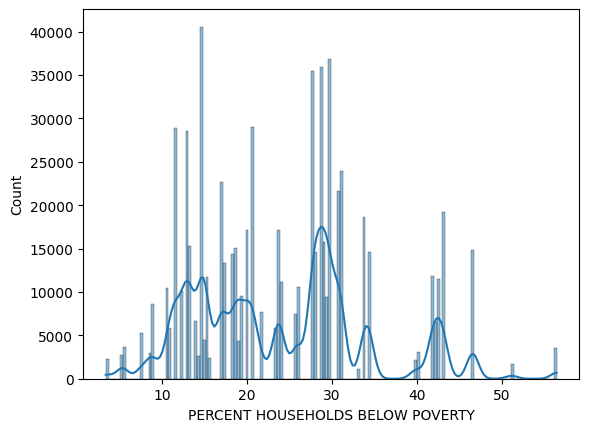

In [23]:
sns.histplot(merged_data['PERCENT HOUSEHOLDS BELOW POVERTY'], kde=True)
plt.show()

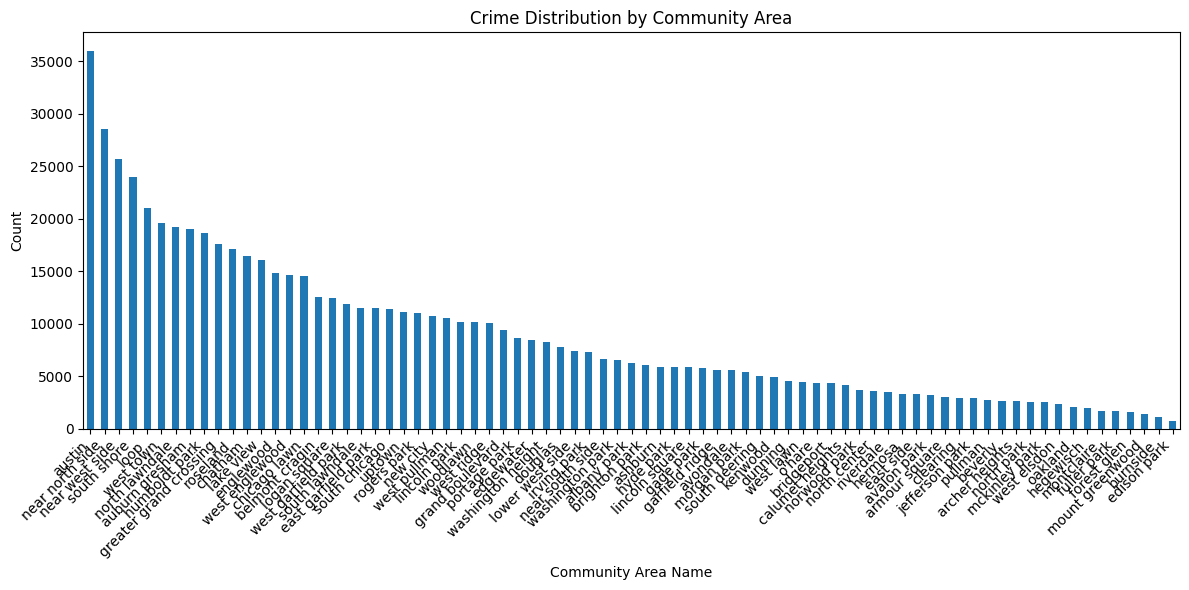

In [24]:
#sns.countplot(x='COMMUNITY AREA NAME', data=merged_data, order=merged_data['COMMUNITY AREA NAME'].value_counts().index)
#plt.xticks(rotation=90)
#plt.title('Crime Distribution by Community Area')
#plt.show()
plt.figure(figsize=(12, 6))  # Increase figure size for better clarity
merged_data.groupby('COMMUNITY AREA NAME')['ID'].count().sort_values(ascending=False).plot(kind='bar')
plt.title("Crime Distribution by Community Area")
plt.xlabel("Community Area Name")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels at 45 degrees
plt.tight_layout()  # Automatically adjust layout for better visibility
plt.show()


In [25]:
# Create the Crime Count column by aggregating crimes
crime_counts = merged_data.groupby(['COMMUNITY AREA NAME', 'Year']).size().reset_index(name='Crime Count')

# Merge the aggregated crime counts back into the main dataset
merged_data = pd.merge(merged_data, crime_counts, on=['COMMUNITY AREA NAME', 'Year'], how='left')

# Verify if Crime Count is added
print(merged_data[['COMMUNITY AREA NAME', 'Year', 'Crime Count']].head())

  COMMUNITY AREA NAME  Year  Crime Count
0             douglas  2020          728
1          bridgeport  2020          423
2       south chicago  2020         1053
3      west englewood  2020         1774
4      auburn gresham  2020         1937


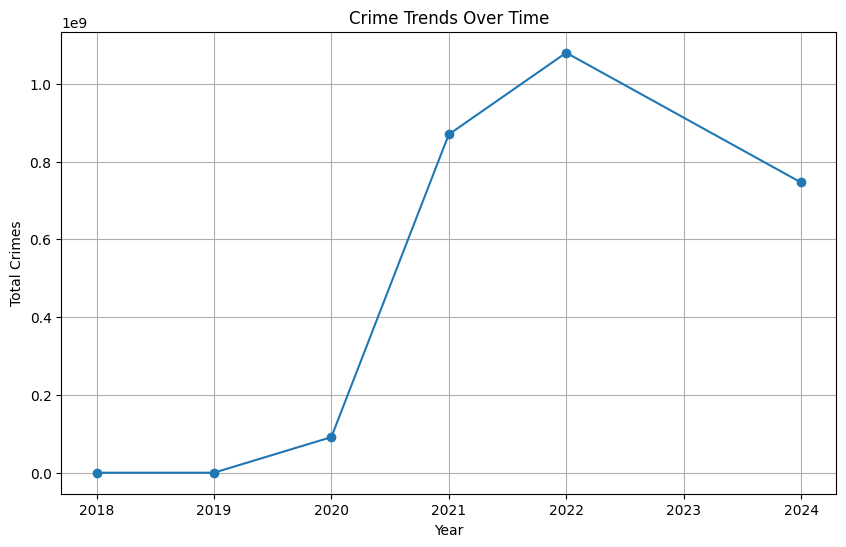

In [26]:
# Group by Year and sum Crime Count
crime_trends = merged_data.groupby('Year')['Crime Count'].sum()

# Plot trends over time
import matplotlib.pyplot as plt

crime_trends.plot(kind='line', figsize=(10, 6), title='Crime Trends Over Time', marker='o')
plt.ylabel('Total Crimes')
plt.xlabel('Year')
plt.grid()
plt.show()

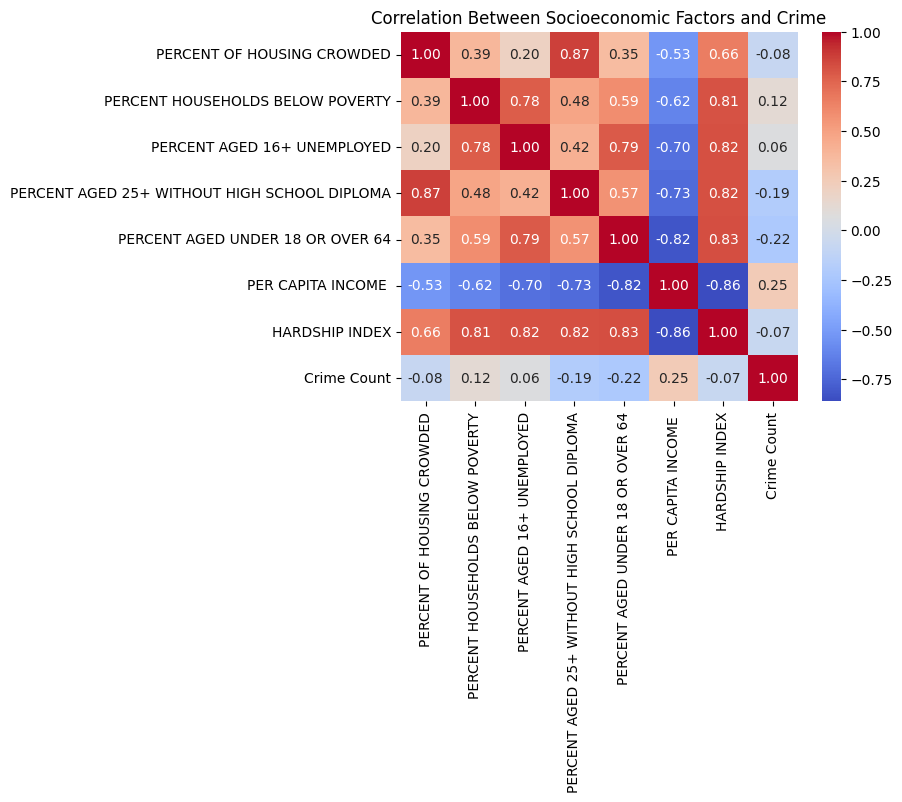

In [27]:
# Correlation heatmap
socio_cols = ['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY', 
              'PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 
              'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ', 'HARDSHIP INDEX', 'Crime Count']
corr_matrix = merged_data[socio_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Socioeconomic Factors and Crime')
plt.show()

In [28]:
merged_data['Month'] = pd.to_datetime(merged_data['Date']).dt.month
merged_data['DayOfWeek'] = pd.to_datetime(merged_data['Date']).dt.dayofweek
merged_data['Hour'] = pd.to_datetime(merged_data['Date']).dt.hour

In [29]:
violent_crimes = ['battery', 'assault', 'homicide']
merged_data['Crime Category'] = merged_data['Primary Type'].apply(
    lambda x: 'Violent' if x.lower() in violent_crimes else 'Non-Violent'
)

In [30]:
merged_data['Risk Index'] = (
    merged_data['PERCENT OF HOUSING CROWDED'] +
    merged_data['PERCENT HOUSEHOLDS BELOW POVERTY'] +
    merged_data['HARDSHIP INDEX']
)


In [31]:
# Define features and target
features = ['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY', 
            'PER CAPITA INCOME ', 'HARDSHIP INDEX', 'Latitude', 'Longitude']
X = merged_data[features]
y = merged_data['Crime Count']


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))
#print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 1220.6850052475888
R2 Score: 0.7942617168593177


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define target as binary (1 for Violent, 0 for Non-Violent)
y_class = (merged_data['Crime Category'] == 'Violent').astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79     98060
           1       0.42      0.30      0.35     38089

    accuracy                           0.69    136149
   macro avg       0.59      0.57      0.57    136149
weighted avg       0.66      0.69      0.67    136149



In [165]:
# Prediction

In [37]:
# Convert Date to datetime format
merged_data.rename(columns={'COMMUNITY AREA NAME': 'Community Area Name'}, inplace=True)
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Extract year and month
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month

# Aggregate crimes by year, month, and community area
crime_by_time = merged_data.groupby(['Year', 'Month', 'Community Area Name']).size().reset_index(name='Crime Count')

In [38]:
# Merge socioeconomic data
crime_by_time = pd.merge(crime_by_time, socio_data, on='Community Area Name', how='left')

In [39]:
# Sort data by community area and time
crime_by_time = crime_by_time.sort_values(by=['Community Area Name', 'Year', 'Month'])

# Add lag features
crime_by_time['Lag 1 Crime Count'] = crime_by_time.groupby('Community Area Name')['Crime Count'].shift(1)
crime_by_time['Lag 2 Crime Count'] = crime_by_time.groupby('Community Area Name')['Crime Count'].shift(2)

# Drop rows with missing lag values
crime_by_time.dropna(subset=['Lag 1 Crime Count', 'Lag 2 Crime Count'], inplace=True)

In [40]:
# Features (socioeconomic data and lag features)

features = [
    'Lag 1 Crime Count', 'Lag 2 Crime Count', 'PERCENT OF HOUSING CROWDED',
    'PERCENT HOUSEHOLDS BELOW POVERTY', 'PER CAPITA INCOME ', 'HARDSHIP INDEX'
]

# Target
target = 'Crime Count'

# Split into features and target
X = crime_by_time[features]
y = crime_by_time[target]

In [41]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 44.70188078483974
R2 Score: 0.9496442902443166


In [ ]:
# Define the features for prediction
features = [
    'Lag 1 Crime Count', 'Lag 2 Crime Count', 'PERCENT OF HOUSING CROWDED',
    'PERCENT HOUSEHOLDS BELOW POVERTY', 'PER CAPITA INCOME ', 'HARDSHIP INDEX'
]

# Step 1: Prepare the most recent data for prediction
# Use the most recent year available in the dataset
future_data = crime_by_time[crime_by_time['Year'] == crime_by_time['Year'].max()].copy()

# Step 2: Add lag features for prediction
future_data['Lag 1 Crime Count'] = future_data['Crime Count']
future_data['Lag 2 Crime Count'] = future_data.groupby('Community Area Name')['Lag 1 Crime Count'].shift(1)

# Step 3: Drop rows with missing lag values
future_data.dropna(subset=['Lag 1 Crime Count', 'Lag 2 Crime Count'], inplace=True)

# Step 4: Verify that all required features exist in the dataset
missing_features = [col for col in features if col not in future_data.columns]
if missing_features:
    print(f"Missing features: {missing_features}. Adding them with default values.")
    for col in missing_features:
        future_data[col] = 0  # Default value for missing features

# Step 5: Prepare features for prediction
X_future = future_data[features]

# Step 6: Check for empty dataset
if X_future.empty:
    print("No data available for prediction. Ensure the input data is correct.")
else:
    # Predict future crimes
    future_predictions = model.predict(X_future)
    future_data['Predicted Crime Count'] = future_predictions

    # Step 7: Display or save predictions
    predictions = future_data[['Year', 'Month', 'Community Area Name', 'Predicted Crime Count']].sort_values(
        by='Predicted Crime Count', ascending=False
    )
    print(predictions)

    #  save predictions to a CSV file
    predictions.to_csv('future_crime_predictions.csv', index=False)

      Year  Month Community Area Name  Predicted Crime Count
3801  2024      6              austin            1112.040000
3878  2024      7              austin            1070.000000
3845  2024      6      near west side            1017.630000
3493  2024      2              austin            1009.840000
3920  2024      7     near north side            1001.610000
...    ...    ...                 ...                    ...
3741  2024      5         edison park              23.510000
3510  2024      2         edison park              21.640000
4049  2024      9         edison park              19.869738
3664  2024      4         edison park              18.973333
4104  2024     10           gage park               2.580714

[617 rows x 4 columns]


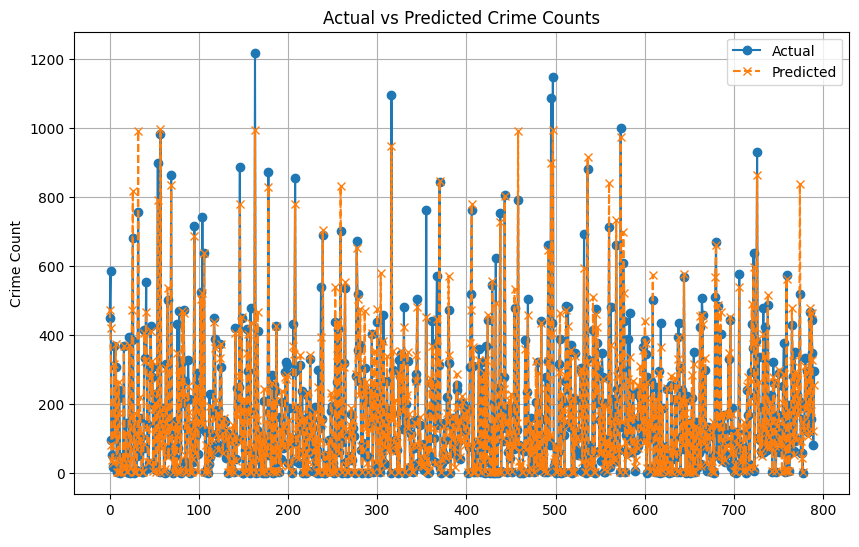

In [44]:
import matplotlib.pyplot as plt

# Plot predicted vs actual crimes
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x', linestyle='--')
plt.title('Actual vs Predicted Crime Counts')
plt.xlabel('Samples')
plt.ylabel('Crime Count')
plt.legend()
plt.grid()
plt.show()

In [117]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("RMSE:", np.sqrt(mse))
print(f"R² Score: {r2:.4f}")

RMSE: 43.456345675772
R² Score: 0.9524


In [47]:
future_data = crime_by_time[crime_by_time['Year'] == 2024].copy()
future_data['Lag 1 Crime Count'] = future_data['Crime Count']
future_data['Lag 2 Crime Count'] = future_data.groupby('Community Area Name')['Lag 1 Crime Count'].shift(1)
future_data.dropna(subset=['Lag 1 Crime Count', 'Lag 2 Crime Count'], inplace=True)

# Prepare features
X_future = future_data[features]

# Predict
future_data['Predicted Crime Count'] = model.predict(X_future)
print(future_data[['Year', 'Month', 'Community Area Name', 'Predicted Crime Count']])

      Year  Month Community Area Name  Predicted Crime Count
3488  2024      2         albany park             190.450317
3565  2024      3         albany park             209.076782
3642  2024      4         albany park             210.393173
3719  2024      5         albany park             244.664062
3796  2024      6         albany park             233.439682
...    ...    ...                 ...                    ...
3795  2024      5            woodlawn             345.513947
3872  2024      6            woodlawn             349.391541
3949  2024      7            woodlawn             365.781250
4026  2024      8            woodlawn             310.248993
4103  2024      9            woodlawn             268.168121

[617 rows x 4 columns]


In [64]:
import torch
from torch_geometric_temporal.nn.recurrent import DCRNN
from torch_geometric.utils import to_dense_adj

class CrimePredictionModel(torch.nn.Module):
    def __init__(self, node_features, hidden_units):
        super(CrimePredictionModel, self).__init__()
        self.recurrent = DCRNN(node_features, hidden_units, K=2)  # K: diffusion steps
        self.linear = torch.nn.Linear(hidden_units, 1)  # Output: Crime count

    def forward(self, x, edge_index):
        h = self.recurrent(x, edge_index)
        out = self.linear(h)
        return out

In [66]:
from torch_geometric_temporal.signal import StaticGraphTemporalSignal
from torch_geometric.utils import to_dense_adj
# Step 1: Define edge connections (Adjacency Matrix)
# Replace with actual adjacency information
edge_index = torch.tensor([
    [0, 1, 1, 2],
    [1, 0, 2, 1]
], dtype=torch.long)

# Step 2: Prepare node features
# Ensure consistent shape across all time steps
features = []
max_nodes = crime_by_time['Community Area Name'].nunique()  # Total number of community areas
for _, group in crime_by_time.groupby(['Year', 'Month']):
    node_features = group[[
        'PERCENT OF HOUSING CROWDED',
        'PERCENT HOUSEHOLDS BELOW POVERTY',
        'Lag 1 Crime Count',
        'Lag 2 Crime Count',
        'PER CAPITA INCOME ',
        'HARDSHIP INDEX'
    ]].values
    # Pad or truncate to match max_nodes
    padded_features = np.zeros((max_nodes, node_features.shape[1]))
    padded_features[:node_features.shape[0], :] = node_features
    features.append(padded_features)

# Convert features to a 3D tensor (time_steps x num_nodes x num_features)
features = np.array(features)  # Shape: (time_steps, max_nodes, num_features)
features = torch.tensor(features, dtype=torch.float)

# Step 3: Define targets (future crime counts)
# Ensure consistent shape across all time steps
targets = []
for _, group in crime_by_time.groupby(['Year', 'Month']):
    crime_targets = group['Crime Count'].values
    # Pad or truncate to match max_nodes
    padded_targets = np.zeros(max_nodes)
    padded_targets[:crime_targets.shape[0]] = crime_targets
    targets.append(padded_targets)

# Convert targets to a 2D tensor (time_steps x num_nodes)
targets = np.array(targets)  # Shape: (time_steps, max_nodes)
targets = torch.tensor(targets, dtype=torch.float)

# Step 4: Create StaticGraphTemporalSignal dataset
dataset = StaticGraphTemporalSignal(
    edge_index=edge_index,
    edge_weight=None,  # Optional: Edge weights (if available)
    features=features,
    targets=targets
)

# Data ready for model training
print("Dataset prepared successfully!")

Dataset prepared successfully!


In [72]:
import torch
from torch_geometric_temporal.nn.recurrent import DCRNN

# Define the DCRNN model
class CrimePredictionModel(torch.nn.Module):
    def __init__(self, node_features, hidden_units):
        super(CrimePredictionModel, self).__init__()
        self.recurrent = DCRNN(in_channels=node_features, out_channels=hidden_units, K=2)  # K is the number of diffusion steps
        self.linear = torch.nn.Linear(hidden_units, 1)

    def forward(self, x, edge_index, edge_weight):
        # Recurrent layer
        h = self.recurrent(x, edge_index, edge_weight)
        # Linear layer for output
        h = self.linear(h)
        return h

In [78]:
# Define the split ratio
train_ratio = 0.8
train_length = int(train_ratio * len(dataset.features))

# Split the dataset
train_features = features[:train_length]
train_targets = targets[:train_length]
val_features = features[train_length:]
val_targets = targets[train_length:]


In [83]:
print(torch.isnan(features).any())  # Check for NaNs in features
print(torch.isnan(targets).any())   # Check for NaNs in targets


tensor(True)
tensor(False)


In [88]:
for t in range(features.shape[0]):  # Iterate over time steps
    for n in range(features.shape[2]):  # Iterate over features
        column = features[t, :, n]
        mean_value = column[~torch.isnan(column)].mean()  # Compute mean excluding NaN
        features[t, :, n][torch.isnan(column)] = mean_value

In [89]:
print(torch.isnan(features).any())  # Should print False


tensor(True)


In [91]:
# Identify rows with NaN in features
nan_locations = torch.isnan(features).nonzero(as_tuple=True)
print(f"NaN found at indices: {nan_locations}")
features[torch.isnan(features)] = 0.0


NaN found at indices: (tensor([23, 23, 23,  ..., 65, 65, 65]), tensor([ 0,  0,  0,  ..., 76, 76, 76]), tensor([0, 1, 4,  ..., 1, 4, 5]))


In [92]:
print(torch.isnan(features).any())  # Should print False


tensor(False)


In [97]:
# Initialize the model
node_features = features.shape[2]  # Number of features per node
hidden_units = 32
model = CrimePredictionModel(node_features, hidden_units)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for t in range(len(train_features) - 1):  # Iterate over time steps
        # Input features and targets
        x = train_features[t]
        y = train_targets[t + 1]  # Predict the next step's crime count
        edge_index = dataset.edge_index

        # Forward pass
        optimizer.zero_grad()
        predictions = model(x, edge_index, edge_weight=None)
        
        # Compute loss
        loss = loss_fn(predictions.squeeze(), y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss / (len(train_features) - 1):.4f}")

Epoch 1, Loss: 35138.3937
Epoch 2, Loss: 33013.3855
Epoch 3, Loss: 30945.5694
Epoch 4, Loss: 29449.9168
Epoch 5, Loss: 29217.8452
Epoch 6, Loss: 30633.1833
Epoch 7, Loss: 29735.0714
Epoch 8, Loss: 29601.1001
Epoch 9, Loss: 28277.1038
Epoch 10, Loss: 27079.4186
Epoch 11, Loss: 28794.5248
Epoch 12, Loss: 27451.6448
Epoch 13, Loss: 26291.1288
Epoch 14, Loss: 27097.9786
Epoch 15, Loss: 26018.1631
Epoch 16, Loss: 25587.1289
Epoch 17, Loss: 24940.9284
Epoch 18, Loss: 26060.0480
Epoch 19, Loss: 26017.7454
Epoch 20, Loss: 25116.2137
Epoch 21, Loss: 24347.2611
Epoch 22, Loss: 23914.8014
Epoch 23, Loss: 24524.9659
Epoch 24, Loss: 24861.6243
Epoch 25, Loss: 24905.4277
Epoch 26, Loss: 23999.5569
Epoch 27, Loss: 23393.7371
Epoch 28, Loss: 22859.5091
Epoch 29, Loss: 22252.5802
Epoch 30, Loss: 23724.0351
Epoch 31, Loss: 23164.3118
Epoch 32, Loss: 22552.3551
Epoch 33, Loss: 22640.7370
Epoch 34, Loss: 22957.5091
Epoch 35, Loss: 22320.3544
Epoch 36, Loss: 24253.1246
Epoch 37, Loss: 23485.0416
Epoch 38, 

In [98]:
model.eval()
val_loss = 0
with torch.no_grad():
    for t in range(len(val_features) - 1):
        x = val_features[t]
        y = val_targets[t + 1]
        edge_index = dataset.edge_index
        
        predictions = model(x, edge_index, edge_weight=None)
        loss = loss_fn(predictions.squeeze(), y)
        val_loss += loss.item()

print(f"Validation Loss: {val_loss / (len(val_features) - 1):.4f}")


Validation Loss: 68188.0925


In [100]:
model.eval()
predicted_crimes = []
x = train_features[-1]  # Start with the last known features

with torch.no_grad():
    for _ in range(12):  # Predict for 12 future time steps
        predictions = model(x, edge_index, edge_weight=None)
        predicted_crimes.append(predictions.squeeze().numpy())
        # Update x with the new predictions (e.g., replace the crime count in x with the predictions)
        x[:, -1] = predictions.squeeze()

print("Future crime predictions:", predicted_crimes)

Future crime predictions: [array([126.59113 ,  22.337181, 107.149956,  95.1208  ,  95.12086 ,
        95.12086 ,  94.66862 ,  95.12083 ,  95.12086 ,  93.19155 ,
        95.119804,  95.12086 ,  68.416534,  95.11322 ,  95.12086 ,
        95.12086 ,  91.591675,  95.12086 ,  95.11465 ,  95.12086 ,
        95.05049 ,  95.120865,  65.62753 ,  95.12086 ,  82.52133 ,
        84.36073 ,  95.120834,  95.12078 ,  95.12086 ,  95.12086 ,
        85.30531 ,  94.65299 ,  95.12086 ,  95.120865,  95.12086 ,
        94.35819 ,  95.120735,  95.12086 ,  95.12086 ,  95.120834,
        95.12086 ,  95.12086 ,  95.12086 ,  94.15582 ,  81.00274 ,
        95.11652 ,  75.92822 ,  95.12086 ,  95.12086 ,  95.12086 ,
        95.12086 ,  95.10952 ,  95.12086 ,  94.208374,  95.11228 ,
        95.118744,  93.43772 ,  95.12086 ,  93.98513 ,  94.72219 ,
        95.12086 ,  95.12086 ,  95.12086 ,  95.12086 ,  95.12086 ,
        95.12086 ,  95.12086 ,  95.12086 ,  95.12086 ,  92.255775,
        95.12086 ,  95.12086 ,  95.